In [33]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import plotly.express as px
import seaborn as sns
import os
from datetime import datetime
from importlib import reload
import functions
reload(functions)

<module 'functions' from '/home/elmunoz42/aimlbootcamp/aimlbootcamp/universal-analytics-data/functions.py'>

In [16]:
# Cosolidate the Data into a pages CSV file with all quarters.
try:
    df = functions.build_ua_pages_dataframe('rtj2/Pages/')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/rtj2/Pages/Analytics All Web Site Data Pages 20210701-20210930.csv
Successfully processed Analytics All Web Site Data Pages 20210701-20210930.csv
Processing file: data/rtj2/Pages/Analytics All Web Site Data Pages 20201001-20201231.csv
Successfully processed Analytics All Web Site Data Pages 20201001-20201231.csv
Processing file: data/rtj2/Pages/Analytics All Web Site Data Pages 20200101-20200331.csv
Successfully processed Analytics All Web Site Data Pages 20200101-20200331.csv
Processing file: data/rtj2/Pages/Analytics All Web Site Data Pages 20210401-20210630.csv
Successfully processed Analytics All Web Site Data Pages 20210401-20210630.csv
Processing file: data/rtj2/Pages/Analytics All Web Site Data Pages 20200401-20200630.csv
Successfully processed Analytics All Web Site Data Pages 20200401-20200630.csv
Processing file: data/rtj2/Pages/Analytics All Web Site Data Pages 20200701-20200930.csv
Successfully processed Analytics All Web Site Data Pages 20200701-20200

In [17]:
# Read the CSV file
df = pd.read_csv('output/rtj2/Pages/consolidated-pages.csv')
# Display the DataFrame
print(df.head())

          Page Pageviews  Unique Pageviews Avg. Time on Page  Entrances  \
0            /     2,011            1797.0          00:02:35     1766.0   
1  /contact-us       210             172.0          00:02:46       64.0   
2        /home       109              97.0          00:01:21       40.0   
3      /awards       104              98.0          00:03:18       52.0   
4  /our-vision        83              71.0          00:01:02       33.0   

   Bounce Rate  % Exit Page Value  Year Quarter  
0       0.7786  78.72%      $0.00  2021      Q3  
1       0.8281  59.52%      $0.00  2021      Q3  
2       0.8750  66.97%      $0.00  2021      Q3  
3       0.9038  67.31%      $0.00  2021      Q3  
4       1.0000  65.06%      $0.00  2021      Q3  


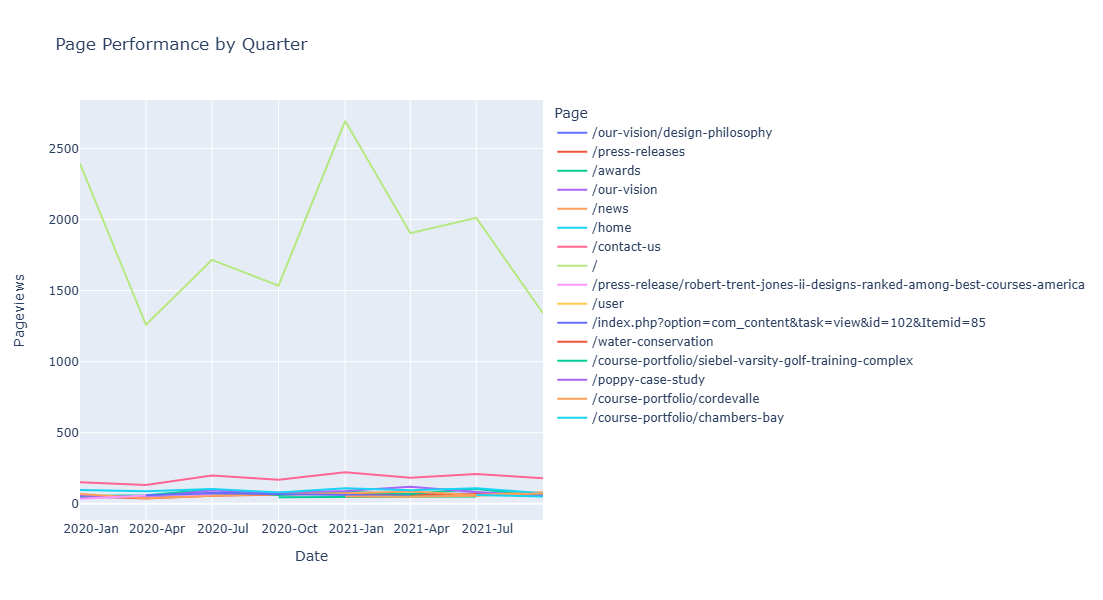

In [20]:
# Read the CSV file
df = pd.read_csv('output/rtj2/Pages/consolidated-pages.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
df['Pageviews'] = pd.to_numeric(df['Pageviews'].str.replace(',', ''), errors='coerce')
# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total and other excludes
exclude_list = ["total"]
fig = px.line(df.query('Page not in @exclude_list'), x='Date', y='Pageviews', color='Page', title='Page Performance by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/rtj2/rtj2-page-performance.html')

In [27]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('rtj2/Sources/')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/rtj2/Sources/Analytics All Web Site Data All Traffic 20210101-20210331.csv
Successfully processed Analytics All Web Site Data All Traffic 20210101-20210331.csv
Processing file: data/rtj2/Sources/Analytics All Web Site Data All Traffic 20200701-20200930.csv
Successfully processed Analytics All Web Site Data All Traffic 20200701-20200930.csv
Processing file: data/rtj2/Sources/Analytics All Web Site Data All Traffic 20210401-20210630.csv
Successfully processed Analytics All Web Site Data All Traffic 20210401-20210630.csv
Processing file: data/rtj2/Sources/Analytics All Web Site Data All Traffic 20211001-20211231.csv
Successfully processed Analytics All Web Site Data All Traffic 20211001-20211231.csv
Processing file: data/rtj2/Sources/Analytics All Web Site Data All Traffic 20210701-20210930.csv
Successfully processed Analytics All Web Site Data All Traffic 20210701-20210930.csv
Processing file: data/rtj2/Sources/Analytics All Web Site Data All Traffic 20201001-202012

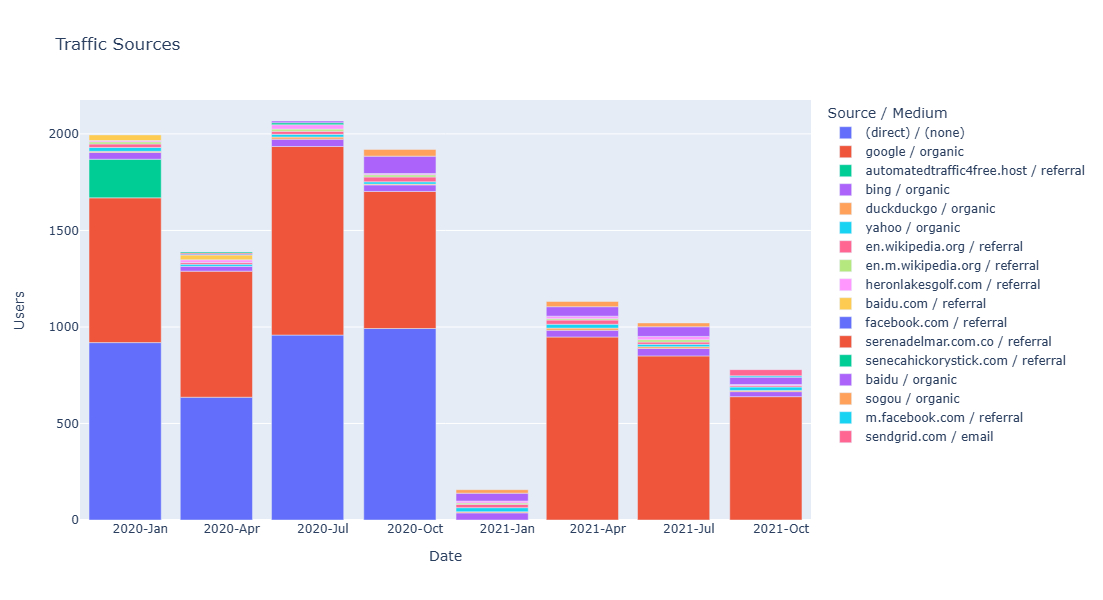

In [30]:

# Read the CSV file
df = pd.read_csv('output/rtj2/Sources/consolidated-sources.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total and other excludes
exclude_list = ["total"]
fig = px.bar(df.query('`Source / Medium` not in @exclude_list'), x='Date', y='Users', color='Source / Medium', title='Traffic Sources')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/rtj2/rtj2-sources-mediums.html')

In [23]:
# Convert 'Date' from date time to date type
# df['Date'] = df['Date'].dt.date

# # Assuming df is your DataFrame and it has columns 'Date' and 'Pageviews'
# quarters = df['Date'].unique()
# # Update the layout

# for quarter in quarters:
#     df_quarter = df[df['Date'] == quarter]
#     fig = px.pie(df_quarter, values='Users', names='Source / Medium', title=f'Pie Chart for Quarter {quarter}')
#     fig.update_layout(
#         autosize=False,
#         width=600,  # Width of the figure in pixels
#         height=600  # Height of the figure in pixels
#     )
#     fig.show()

In [34]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('rtj2/Landing Pages/')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/rtj2/Landing Pages/Analytics All Web Site Data Landing Pages 20200101-20200331.csv
Successfully processed Analytics All Web Site Data Landing Pages 20200101-20200331.csv
Processing file: data/rtj2/Landing Pages/Analytics All Web Site Data Landing Pages 20200701-20200930.csv
Successfully processed Analytics All Web Site Data Landing Pages 20200701-20200930.csv
Processing file: data/rtj2/Landing Pages/Analytics All Web Site Data Landing Pages 20211001-20211231.csv
Successfully processed Analytics All Web Site Data Landing Pages 20211001-20211231.csv
Processing file: data/rtj2/Landing Pages/Analytics All Web Site Data Landing Pages 20201001-20201231.csv
Successfully processed Analytics All Web Site Data Landing Pages 20201001-20201231.csv
Processing file: data/rtj2/Landing Pages/Analytics All Web Site Data Landing Pages 20200401-20200630.csv
Successfully processed Analytics All Web Site Data Landing Pages 20200401-20200630.csv
Processing file: data/rtj2/Landing Pages

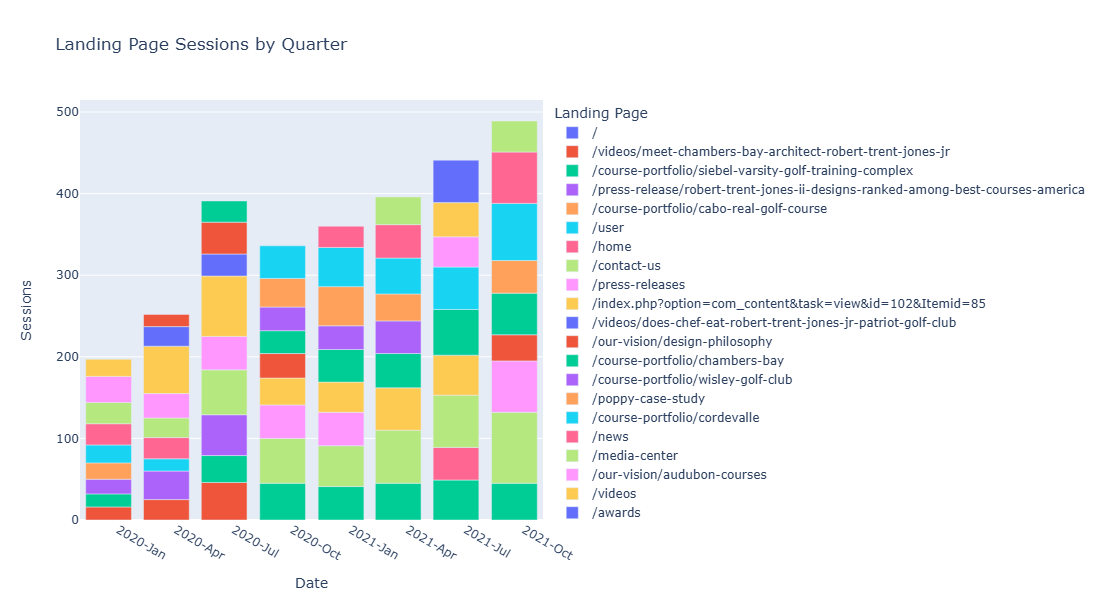

In [36]:
# Read the CSV file
df = pd.read_csv('output/rtj2/Landing Pages/consolidated-landing-pages.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total
exclude_list = ["total"]
fig = px.bar(df.query('`Landing Page` not in @exclude_list'), x='Date', y='Sessions', color='Landing Page', title='Landing Page Sessions by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/rtj2/rtj2-landing-pages.html')

In [38]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('rtj2/Events or Conversions')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/rtj2/Events or Conversions/Analytics All Web Site Data Top Events 20201001-20201231.csv
Successfully processed Analytics All Web Site Data Top Events 20201001-20201231.csv
Processing file: data/rtj2/Events or Conversions/Analytics All Web Site Data Top Events 20200701-20200930.csv
Successfully processed Analytics All Web Site Data Top Events 20200701-20200930.csv
Processing file: data/rtj2/Events or Conversions/Analytics All Web Site Data Top Events 20210701-20210930.csv
Successfully processed Analytics All Web Site Data Top Events 20210701-20210930.csv
Processing file: data/rtj2/Events or Conversions/Analytics All Web Site Data Top Events 20200401-20200630.csv
Successfully processed Analytics All Web Site Data Top Events 20200401-20200630.csv
Processing file: data/rtj2/Events or Conversions/Analytics All Web Site Data Top Events 20210401-20210630.csv
Successfully processed Analytics All Web Site Data Top Events 20210401-20210630.csv
Processing file: data/rtj2/Eve

In [39]:
# GOAL URLS / CONVERSIONS  
# Read the CSV file
df = pd.read_csv('output/rtj2/Events or Conversions/consolidated-goal-urls.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
df['Goal Completions'] = pd.to_numeric(df['Goal Completions'].str.replace(',', ''), errors='coerce')
# Sort by date
df = df.sort_values("Date")

# Create Line Plot with the goals completion locations that exist
# include_list = [] in @include_list
fig = px.line(df.query('`Goal Completion Location`'), x='Date', y='Goal Completions', color='Goal Completion Location', title='Goal Completions by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
# fig.write_html('output/rtj2/rtj2-goal-urls.html')

KeyError: 'Goal Completions'

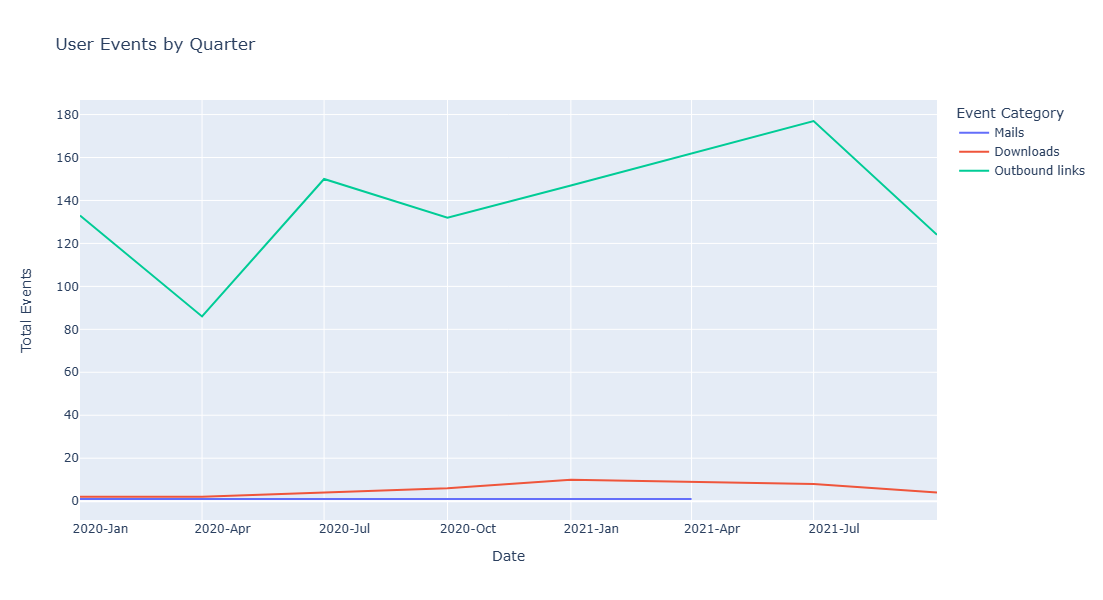

In [53]:
# EVENTS 
# Read the CSV file
df = pd.read_csv('output/rtj2/Events or Conversions/consolidated-events.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
# df['Total Events'] = pd.to_numeric(df['Total Events'].str.replace(',', ''), errors='coerce')
# Sort by date
df = df.sort_values("Date")

# Create Line Plot with the goals completion locations that exist
include_list = ["Mails", "Downloads", "Outbound links"]
fig = px.line(df.query('`Event Category` in @include_list'), x='Date', y='Total Events', color='Event Category', title='User Events by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1000,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/rtj2/rtj2-events.html')